In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [120]:
import io

In [121]:
from google.colab import files
uploaded = files.upload()

Saving TSM.csv to TSM (1).csv


In [124]:
df = pd.read_csv(io.BytesIO(uploaded['TSM (1).csv']))
print(df)

          Date        Open        High         Low       Close   Adj Close  \
0     2/8/2023   95.019997   95.940002   94.230003   94.279999   92.482452   
1     2/9/2023   96.000000   98.570000   95.620003   96.690002   94.846504   
2    2/10/2023   95.949997   96.500000   94.250000   95.370003   93.551674   
3    2/13/2023   95.470001   96.389999   94.910004   96.110001   94.277557   
4    2/14/2023   95.820000   98.989998   95.220001   97.959999   96.092293   
..         ...         ...         ...         ...         ...         ...   
246   2/1/2024  113.800003  114.029999  112.610001  113.389999  113.389999   
247   2/2/2024  114.860001  115.959999  113.919998  115.750000  115.750000   
248   2/5/2024  117.129997  119.540001  116.580002  118.790001  118.790001   
249   2/6/2024  120.120003  120.989998  118.279999  119.379997  119.379997   
250   2/7/2024  120.010002  125.000000  120.000000  124.980003  124.980003   

        Average  
0     94.390491  
1     96.345302  
2     95.

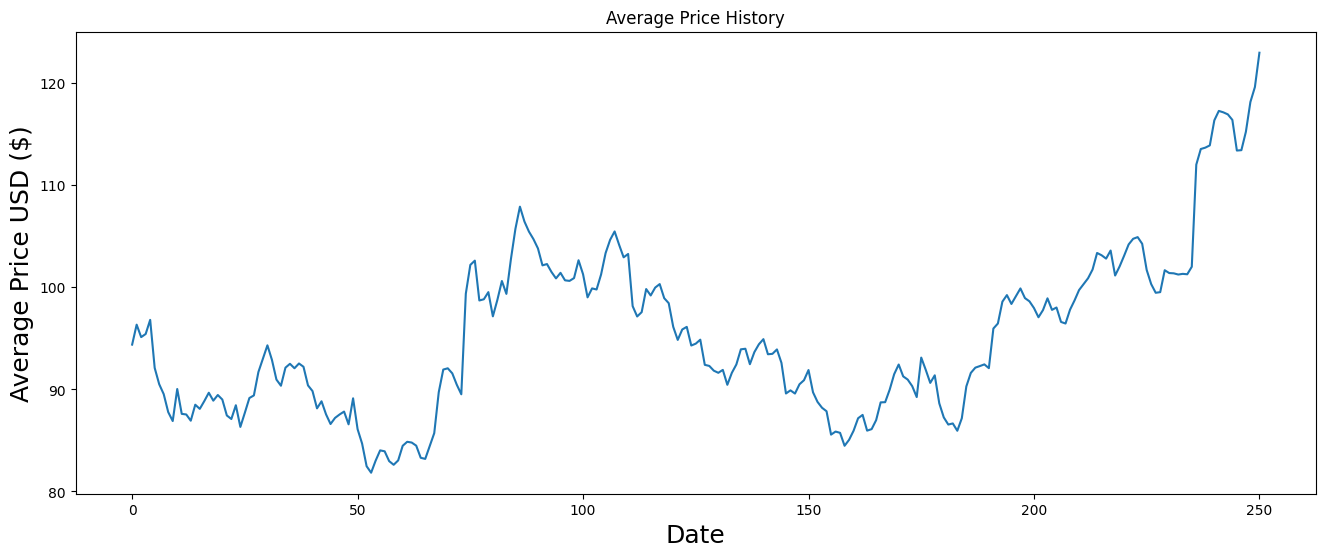

In [125]:
plt.figure(figsize=(16,6))
plt.title('Average Price History')
plt.plot(df['Average'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.show()

In [126]:
data = df.filter(['Average'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.95 ))
window_size = 60
training_data_len

239

In [127]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
print('scaled_data.shape', len(dataset))
scaled_data

scaled_data.shape 251


array([[-0.10545233],
       [ 0.13652448],
       [-0.01461323],
       [ 0.02341083],
       [ 0.1948467 ],
       [-0.38820311],
       [-0.58559145],
       [-0.70606582],
       [-0.92400482],
       [-1.03255338],
       [-0.64416391],
       [-0.94551781],
       [-0.95280997],
       [-1.02845804],
       [-0.83450509],
       [-0.88504975],
       [-0.79083652],
       [-0.68923306],
       [-0.78519387],
       [-0.71680865],
       [-0.7718392 ],
       [-0.96491744],
       [-1.00797879],
       [-0.84085718],
       [-1.10379281],
       [-0.93132395],
       [-0.75337962],
       [-0.72163982],
       [-0.43827895],
       [-0.27715201],
       [-0.11418921],
       [-0.28983733],
       [-0.52949163],
       [-0.60430994],
       [-0.38514115],
       [-0.33825043],
       [-0.39216337],
       [-0.3344171 ],
       [-0.37429219],
       [-0.60013815],
       [-0.66897647],
       [-0.87874242],
       [-0.79291156],
       [-0.95103237],
       [-1.06869073],
       [-0

In [128]:
train_data = scaled_data[0: int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= window_size + 1:
      print('x_train', x_train)
      print('\n y_train', y_train)
      print()

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('x_train.shape', x_train.shape)

x_train [array([-0.10545233,  0.13652448, -0.01461323,  0.02341083,  0.1948467 ,
       -0.38820311, -0.58559145, -0.70606582, -0.92400482, -1.03255338,
       -0.64416391, -0.94551781, -0.95280997, -1.02845804, -0.83450509,
       -0.88504975, -0.79083652, -0.68923306, -0.78519387, -0.71680865,
       -0.7718392 , -0.96491744, -1.00797879, -0.84085718, -1.10379281,
       -0.93132395, -0.75337962, -0.72163982, -0.43827895, -0.27715201,
       -0.11418921, -0.28983733, -0.52949163, -0.60430994, -0.38514115,
       -0.33825043, -0.39216337, -0.3344171 , -0.37429219, -0.60013815,
       -0.66897647, -0.87874242, -0.79291156, -0.95103237, -1.06869073,
       -0.99447151, -0.95315259, -0.91755432, -1.0724661 , -0.75703109,
       -1.13124046, -1.30626828, -1.58075437, -1.65946842, -1.5131494 ,
       -1.38834385, -1.39962138, -1.51884572, -1.56331857, -1.51011656])]

 y_train [-1.3328722097697414]

x_train [array([-0.10545233,  0.13652448, -0.01461323,  0.02341083,  0.1948467 ,
       -0.3

In [129]:
print(x_train.shape[1])

60


In [130]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
!pip install layers

In [131]:
import tensorflow as tf

In [132]:
def build_lstm_model():
  input = tf.keras.layers.Input(shape = (x_train.shape[1], 1), name = 'input')
  x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences = True))(input)
  x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences = False, dropout = 0.5))(x)
  output = tf.keras.layers.Dense(1, name = "last_dense")(x)
  model = tf.keras.Model(inputs = input, outputs = output)
  return model

LSTM_model = build_lstm_model()
LSTM_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_12 (Bidirect  (None, 60, 256)           133120    
 ional)                                                          
                                                                 
 bidirectional_13 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 last_dense (Dense)          (None, 1)                 129       
                                                                 
Total params: 297601 (1.14 MB)
Trainable params: 297601 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
epochs = 50
batch_size = 32
early_stopping_patience = 20

LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
price = LSTM_model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/50
6/6 [==============================] - 20s 636ms/step - loss: 0.3320
Epoch 2/50
6/6 [==============================] - 3s 418ms/step - loss: 0.1897
Epoch 3/50
6/6 [==============================] - 2s 257ms/step - loss: 0.1540
Epoch 4/50
6/6 [==============================] - 1s 223ms/step - loss: 0.1368
Epoch 5/50
6/6 [==============================] - 1s 232ms/step - loss: 0.1227
Epoch 6/50
6/6 [==============================] - 1s 225ms/step - loss: 0.1121
Epoch 7/50
6/6 [==============================] - 1s 226ms/step - loss: 0.1023
Epoch 8/50
6/6 [==============================] - 2s 378ms/step - loss: 0.0997
Epoch 9/50
6/6 [==============================] - 2s 286ms/step - loss: 0.0946
Epoch 10/50
6/6 [==============================] - 1s 226ms/step - loss: 0.0937
Epoch 11/50
6/6 [==============================] - 1s 232ms/step - loss: 0.0922
Epoch 12/50
6/6 [==============================] - 1s 228ms/step - loss: 0.0898
Epoch 13/50
6/6 [==============================]

In [134]:
test_data = scaled_data[training_data_len - window_size: ]
print('len(test_data): ', len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i - window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = LSTM_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data):  72
1/1 [==============================] - 3s 3s/step


5.321283174972518

<ipython-input-135-8f188311654f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


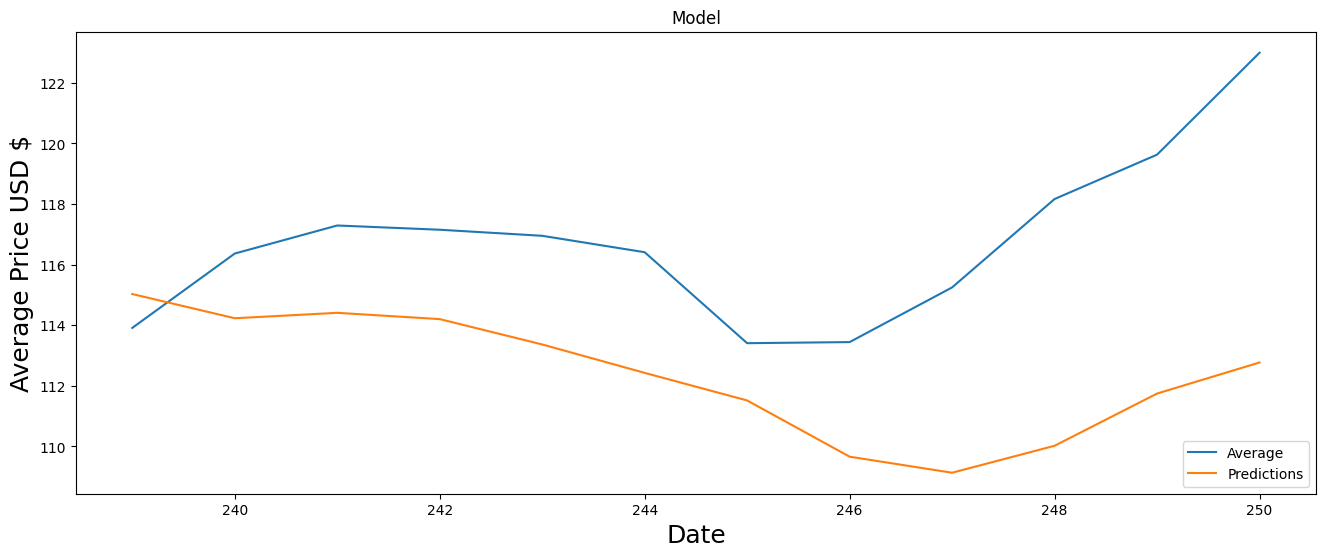

In [135]:
train = data[: training_data_len]
test = data[training_data_len: ]
test['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Average Price USD $', fontsize = 18)
plt.plot(test[['Average', 'Predictions']])
plt.legend(['Average', 'Predictions'], loc = 'lower right')
plt.show()

In [136]:
test[:]

,Average,Predictions
239,113.912000,115.030090
240,116.365999,114.231148
241,117.291998,114.409821
242,117.152002,114.202850
243,116.952002,113.366127
244,116.409999,112.427917
245,113.407999,111.517952
246,113.444000,109.662117
247,115.248000,109.132782
248,118.166000,110.022072
